# Assignment

    Predicting Survival in the Titanic Data Set, We will be using a decision tree to make predictions about the Titanic data set from Kaggle. This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not.

### Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.

### Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

### Sex - Sex

### Age - Age

### Sibsp - Number of Siblings/Spouses Aboard

### Parch - Number of Parents/Children Aboard

### Fare - Passenger Fare

# Loading Data and modules

In [1]:

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
Url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

In [3]:
titanic = pd.read_csv(Url)

In [4]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic.shape

(891, 12)

"""

    You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and  Fare to predict whether a passenger survived.


"""

In [8]:
predict= titanic[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare",'Survived']]

In [9]:
predict

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,0
887,1,female,19.0,0,0,30.0000,1
888,3,female,NaN,1,2,23.4500,0
889,1,male,26.0,0,0,30.0000,1


In [10]:
predict.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived'], dtype='object')

In [11]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [12]:
predict.shape

(891, 7)

In [13]:
predict.describe().T

,count,mean,std,min,25%,50%,75%,max
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000


 Get missing data in Age column, and one categorical type column get found which is sex, 
    now fill the missing value of age column and convert the categorical to numerical column

In [14]:
cat_var = [key for key in dict(predict.dtypes)
             if dict(predict.dtypes)[key] in ['object'] ]
cat_var

['Sex']

In [15]:
predict.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64

In [16]:
predict["Age"].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [17]:
predict["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

<AxesSubplot:>

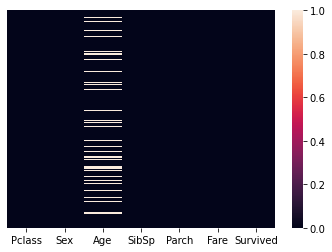

In [18]:
import seaborn as sns
sns.heatmap(predict.isnull(),yticklabels=False)

<AxesSubplot:>

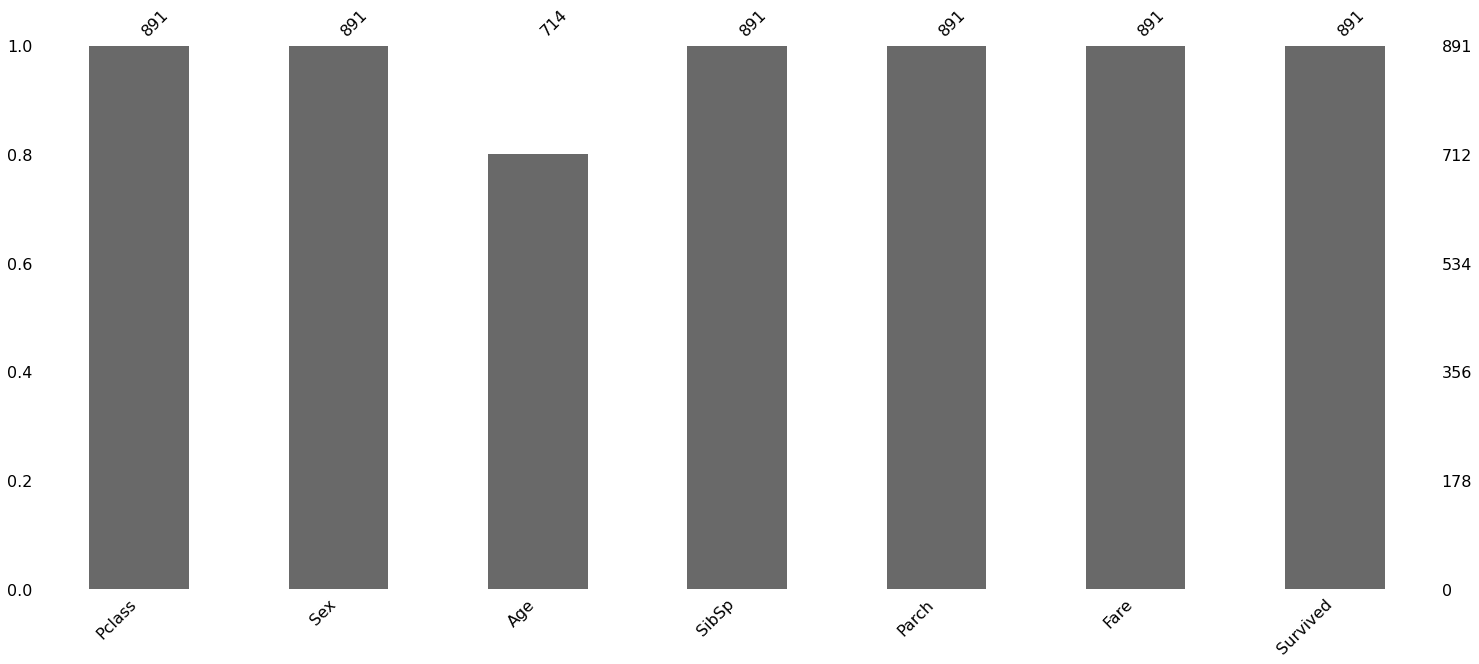

In [19]:
import missingno as msno

msno.bar(predict)

In [20]:
# list of categorical variables
categorical_features = [feature for feature in predict.columns if predict[feature].dtypes=='object']
categorical_features

['Sex']

In [21]:
median=predict.Age.median()
median

28.0

In [15]:
mean=titanic.Age.mean()
mean

29.69911764705882

In [23]:
mode=predict.Age.mode()
mode

0    24.0
dtype: float64

In [14]:
def impute_nan(df,variable,mean):
    df[variable]=df[variable].fillna(mean)

In [16]:
impute_nan(titanic,"Age",mean)

<AxesSubplot:>

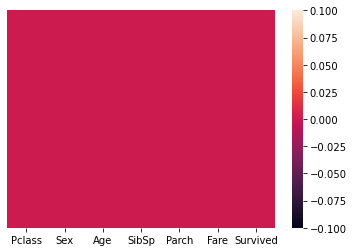

In [26]:
sns.heatmap(predict.isnull(),yticklabels=False)

In [27]:
predict

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.000000,1,0,7.2500,0
1,1,female,38.000000,1,0,71.2833,1
2,3,female,26.000000,0,0,7.9250,1
3,1,female,35.000000,1,0,53.1000,1
4,3,male,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,0
887,1,female,19.000000,0,0,30.0000,1
888,3,female,29.699118,1,2,23.4500,0
889,1,male,26.000000,0,0,30.0000,1


pd.get_dummies(predict,drop_first=True).head()

In [28]:
predict['Sex'] = predict['Sex'].map({'male': 1,'female': 0}) #use map function by dictionary if only male and female exist in column Sex

In [29]:
predict # one hot encoding

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.000000,1,0,7.2500,0
1,1,0,38.000000,1,0,71.2833,1
2,3,0,26.000000,0,0,7.9250,1
3,1,0,35.000000,1,0,53.1000,1
4,3,1,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,0
887,1,0,19.000000,0,0,30.0000,1
888,3,0,29.699118,1,2,23.4500,0
889,1,1,26.000000,0,0,30.0000,1


In [30]:
predict["SibSp"].nunique()

7

In [31]:
predict["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [32]:
predict["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [33]:
predict["Parch"].nunique()
predict["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

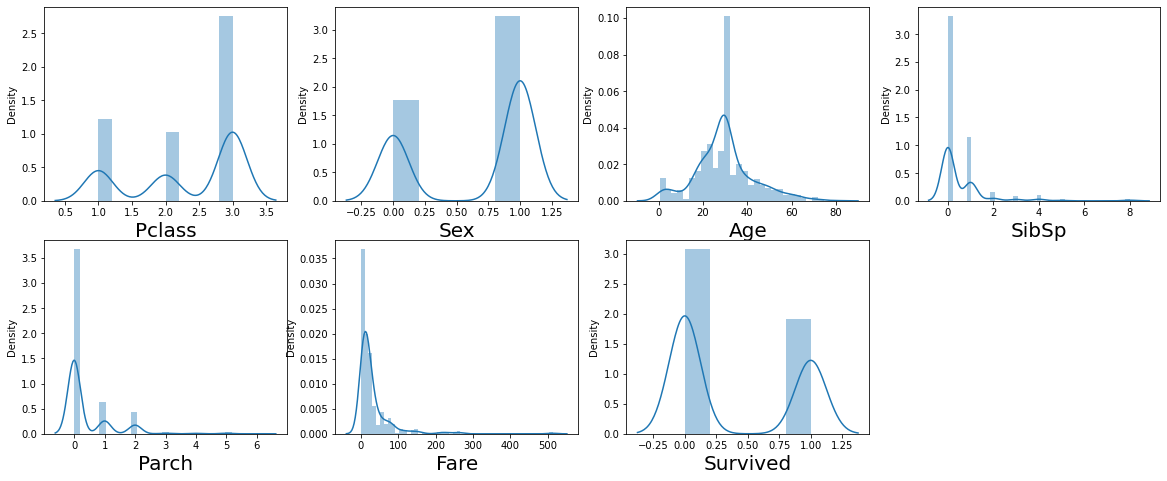

<Figure size 432x288 with 0 Axes>

In [34]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in predict:
    if plotnumber<=7 :     # as there are 24 columns in the data
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(predict[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

plt.savefig('Distribution plot.png')

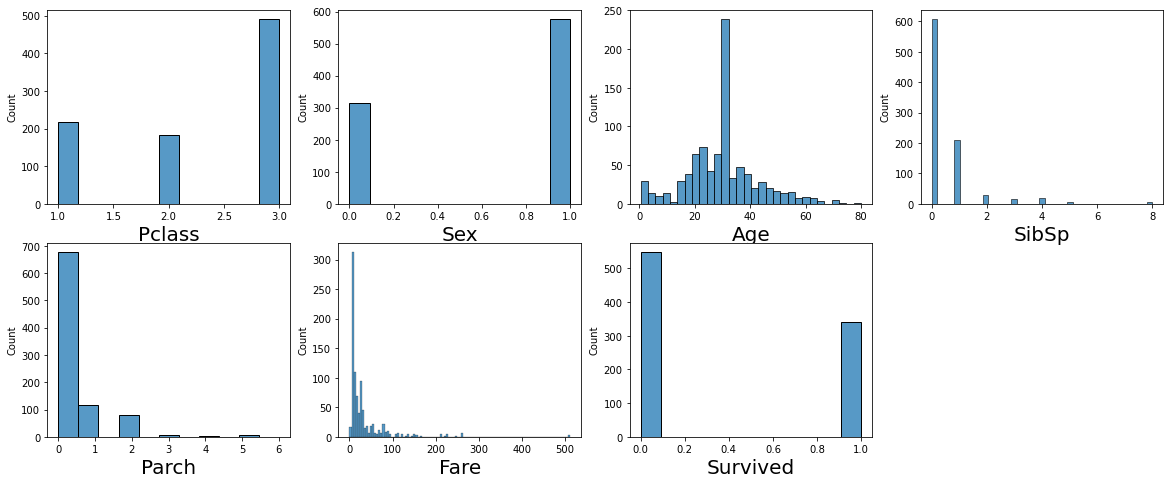

<Figure size 432x288 with 0 Axes>

In [35]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in predict:
    if plotnumber<=24 :     # as there are 24 columns in the data
        ax = plt.subplot(6,4,plotnumber)
        sns.histplot(predict[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

plt.savefig('Histogram plot.png')

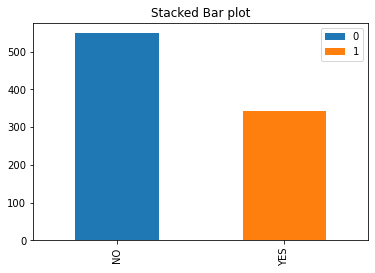

In [36]:
#Survived: Survivedt (1=yes, 0=no)

# Stacked barplot with pandas
NO = predict.loc[predict['Survived']==1, :]['Survived'].value_counts()
YES     = predict.loc[predict['Survived']==0, :]['Survived'].value_counts()
predict_plot  = pd.DataFrame([YES,NO])
predict_plot.index=["NO","YES"]

# Plot
predict_plot.plot(kind='bar',stacked=True, title='Stacked Bar plot');

<AxesSubplot:>

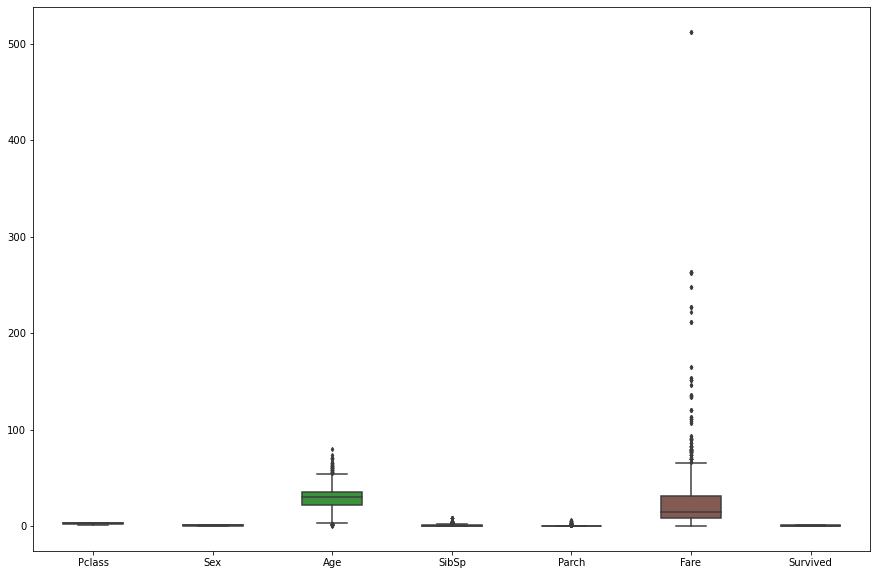

In [37]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=predict, width= 0.5,ax=ax,  fliersize=3)

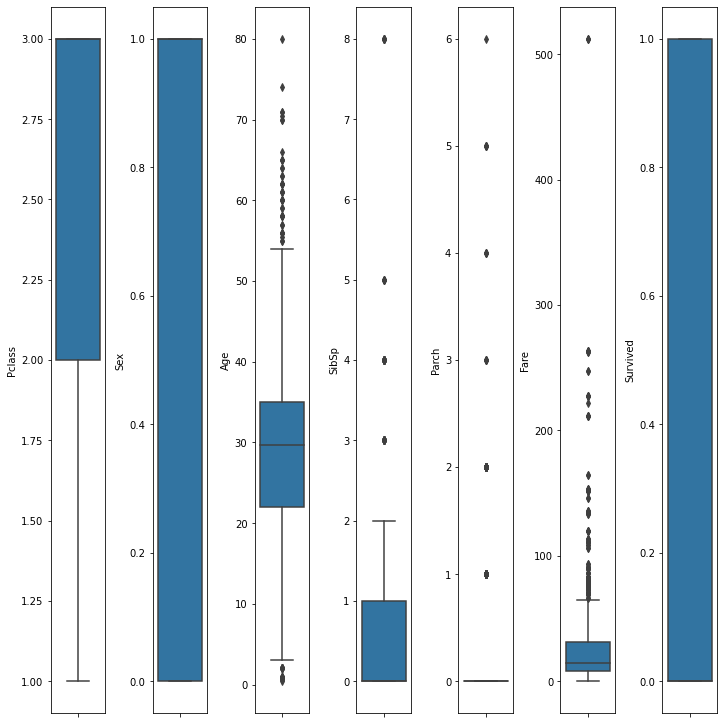

In [38]:
# create a box plot
fig , ax = plt.subplots(ncols=7,figsize=(10,10))
index=0
ax = ax.flatten()

for col, value in predict.items():
    sns.boxplot(y=col,data= predict, ax = ax[index])
    index += 1
    
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0) 

# function to create diagnostic plots

In [39]:
def plotvarible(df, variable):
    plt.figure(figsize=(16,4))
    
    #Histogram
    
    plt.subplot(1,2,1)
    plt.hist(df[variable],alpha=0.5)
    
    #boxplot
    
    plt.subplot(1,2,2)
    plt.boxplot(df[variable])
    plt.show()

# Function to get information about outliers

In [18]:
def detectoutliers(column):
    
    numbers = sorted(column)
    
    #outliers=[]
    
    Q1 = np.quantile(column, .25) #quantile() method calculates the quantile of the values in a given axis
    Q3 = np.quantile(column, .75) #Compute the q-th percentile of the data along the specified axis.
    Q2 = np.quantile(column, .50) 
    
    
    #print('Q1,Q3 : ',Q1,Q3)
    
    
    IQR = Q3-Q1
    lower_bound_val = Q1 -(1.5 * IQR) 
    upper_bound_val = Q3 +(1.5 * IQR) 
    
   
    
    no_outliers = column[(Q1 - 1.5*IQR < column) &  (column < Q3 + 1.5*IQR)]
    
    outliers = column [(Q1 - 1.5*IQR >= column) |  (column >= Q3 + 1.5*IQR)] # or
    
    lower_fence_otlier=column [(Q1 - 1.5*IQR >= column)]
    
    upper_fence_otlier=column [(column >= Q3 + 1.5*IQR)]
    
    #column = np.where(column>upper_bound_val,upper_bound_val,
                          #np.where(column<lower_bound_val,lower_bound_val,column)
                      
                      
    #outliers = column[(column < lower_bound_val) | (column > Q3 + upper_bound_val)]
                      
    
    
    print("Quantile-1 (Q1): ",Q1, "\n")
    print("Quantile-2-median (Q2): ",Q2, "\n")
    print("Quantile-3 (Q3): ",Q3, "\n")
    print("Inter Quantile Range (IQR): ",IQR, "\n")
    
    print('lowerBound : ',lower_bound_val,"\n")
    print('upperBound : ',upper_bound_val,"\n")
    
    print("Sorted Column values: ",numbers,"\n")
    
    print('Detection Success',"\n")
    
    print('No_outliers : ',sorted(no_outliers),"\n")
    
    #print('Outliers : ',sorted(outliers),"\n")
    
    print('lower_fence_otlier : ',sorted(lower_fence_otlier),"\n")
    
    print('upper_fence_otlier : ',sorted(upper_fence_otlier),"\n")
    
    
    print('Length lower_fence_otlier : ',len(lower_fence_otlier),"\n")
    
    print('Length upper_fence_otlier : ',len(upper_fence_otlier),"\n")
    
    #print('Outliers : ',outliers,"\n")
    
    print('Length Outliers : ',len(outliers),"\n")
    
    
    return lower_bound_val,upper_bound_val #,outliers
        


In [19]:
detectoutliers(titanic["Fare"])

Quantile-1 (Q1):  7.9104 

Quantile-2-median (Q2):  14.4542 

Quantile-3 (Q3):  31.0 

Inter Quantile Range (IQR):  23.0896 

lowerBound :  -26.724 

upperBound :  65.6344 

Sorted Column values:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0125, 5.0, 6.2375, 6.4375, 6.45, 6.4958, 6.4958, 6.75, 6.75, 6.8583, 6.95, 6.975, 6.975, 7.0458, 7.05, 7.05, 7.05, 7.05, 7.05, 7.05, 7.05, 7.0542, 7.0542, 7.125, 7.125, 7.125, 7.125, 7.1417, 7.225, 7.225, 7.225, 7.225, 7.225, 7.225, 7.225, 7.225, 7.225, 7.225, 7.225, 7.225, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.3125, 7.4958, 7.4958, 7.4958, 7.5208, 7.55, 7.55, 7.55, 7.55, 7.6292, 7.65, 7.65, 7.65, 7.65, 7.725, 7.7292, 7.7333, 7.7333, 7.7333, 7.7333, 7.7375, 7.7375, 7.7417, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7

(-26.724, 65.6344)

In [20]:
detectoutliers(titanic["Age"])

Quantile-1 (Q1):  22.0 

Quantile-2-median (Q2):  29.69911764705882 

Quantile-3 (Q3):  35.0 

Inter Quantile Range (IQR):  13.0 

lowerBound :  2.5 

upperBound :  54.5 

Sorted Column values:  [0.42, 0.67, 0.75, 0.75, 0.83, 0.83, 0.92, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 7.0, 7.0, 7.0, 8.0, 8.0, 8.0, 8.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 10.0, 10.0, 11.0, 11.0, 11.0, 11.0, 12.0, 13.0, 13.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.5, 15.0, 15.0, 15.0, 15.0, 15.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 19.0, 19.0, 19.0, 19.0, 1

(2.5, 54.5)

In [41]:
predict

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.000000,1,0,7.2500,0
1,1,0,38.000000,1,0,71.2833,1
2,3,0,26.000000,0,0,7.9250,1
3,1,0,35.000000,1,0,53.1000,1
4,3,1,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,0
887,1,0,19.000000,0,0,30.0000,1
888,3,0,29.699118,1,2,23.4500,0
889,1,1,26.000000,0,0,30.0000,1


# Model Building

# Traning Model to test accuracy

In [42]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

%matplotlib inline

In [43]:
X = predict.drop(columns = 'Survived')
y = predict['Survived']

In [44]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 355)


# 70 % data is train data and rest 30 is test data

In [45]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((623, 6), (268, 6), (623,), (268,))

In [46]:
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()  # model object 

clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [47]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
feature_name

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [48]:
class_name

[1, 0]

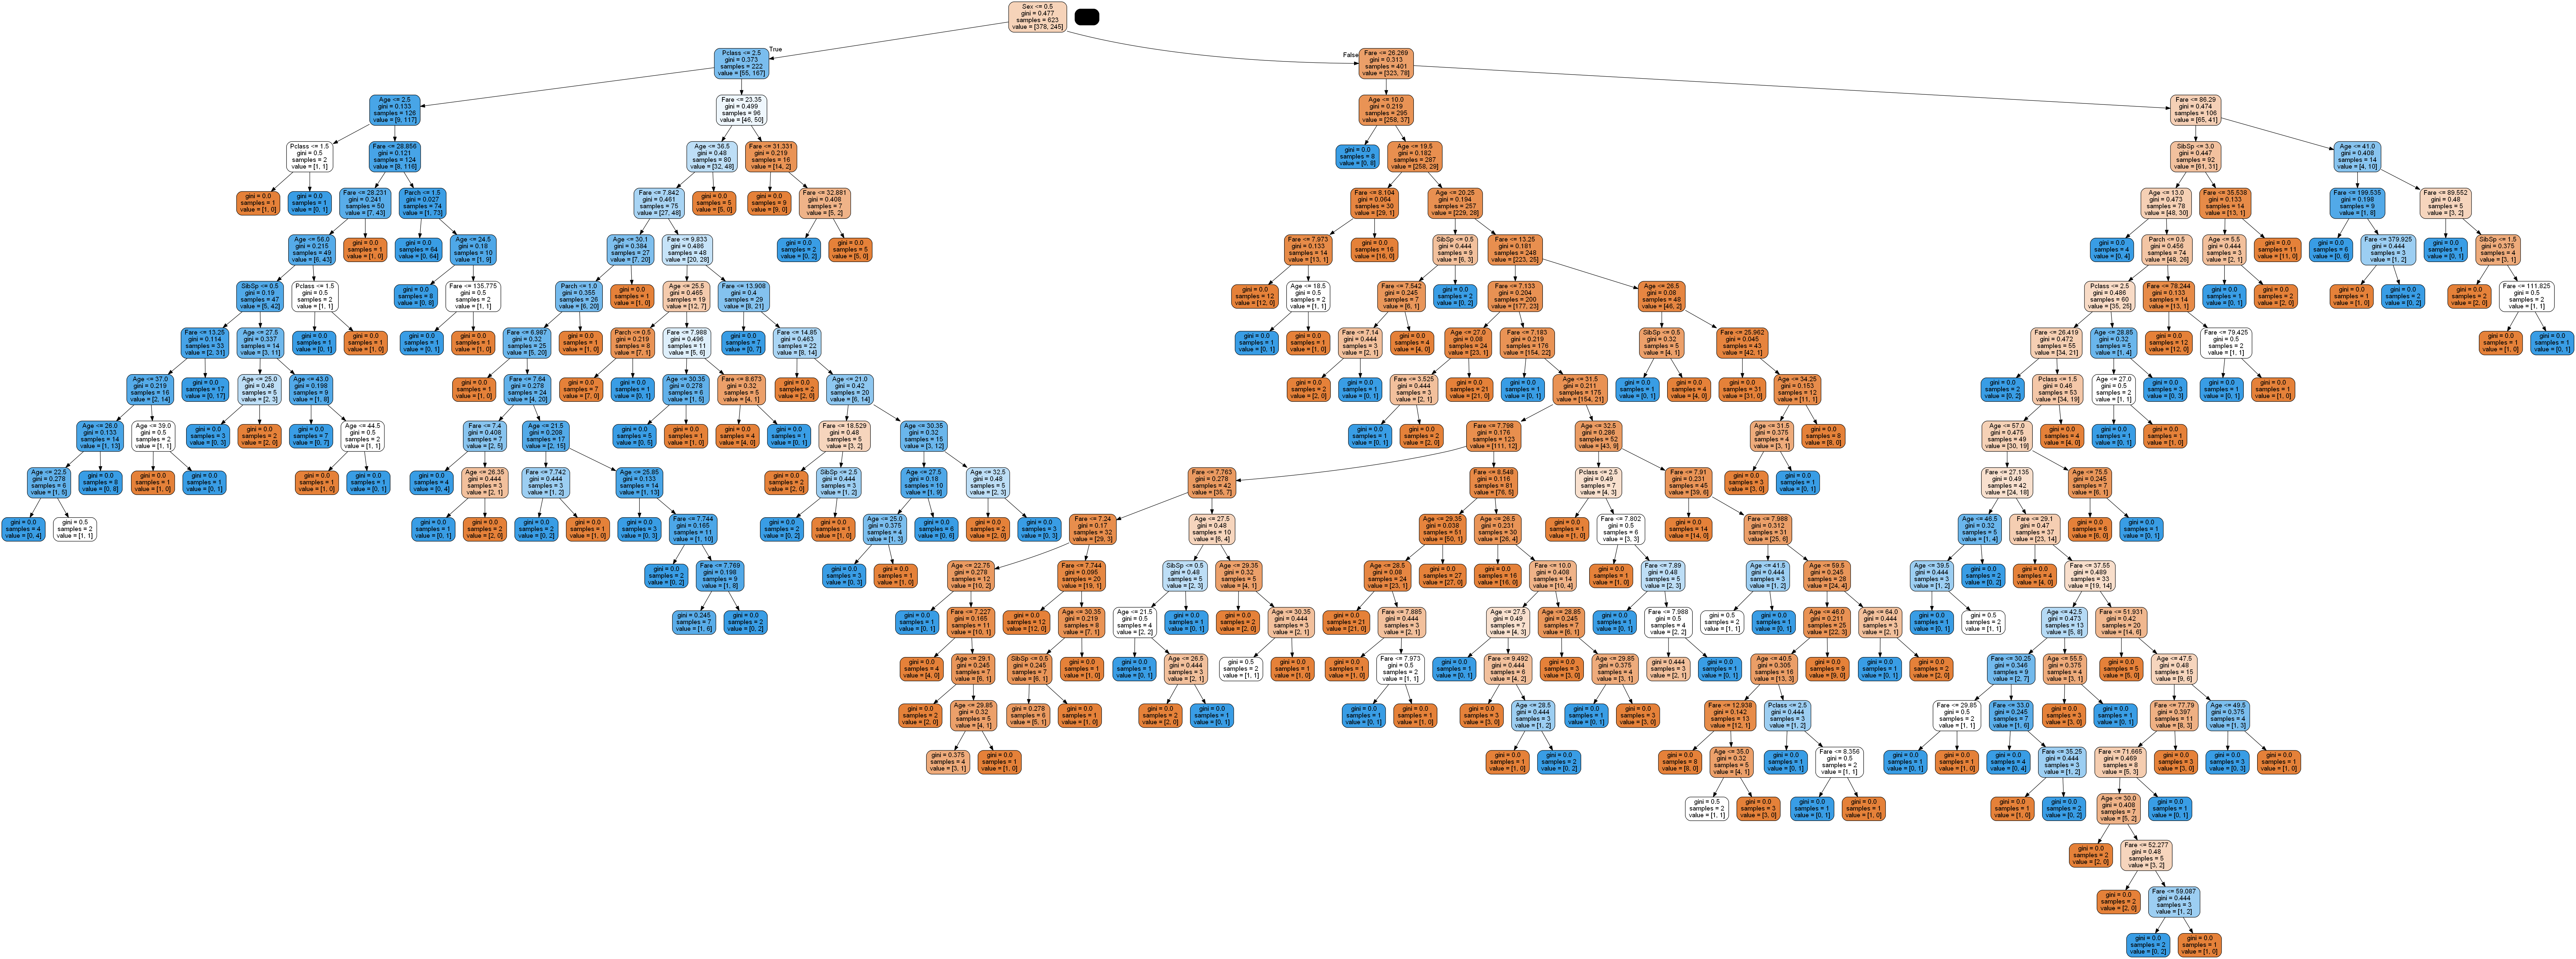

In [49]:
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,feature_names = feature_name,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())

In [50]:
y_train.unique()
y_train.value_counts()

0    378
1    245
Name: Survived, dtype: int64

[Text(367.32472826086956, 1061.3142857142857, 'X[1] <= 0.5\ngini = 0.477\nsamples = 623\nvalue = [378, 245]'),
 Text(154.55601023017903, 1009.5428571428572, 'X[0] <= 2.5\ngini = 0.373\nsamples = 222\nvalue = [55, 167]'),
 Text(85.62659846547315, 957.7714285714286, 'X[2] <= 2.5\ngini = 0.133\nsamples = 126\nvalue = [9, 117]'),
 Text(68.50127877237851, 906.0, 'X[0] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(61.65115089514067, 854.2285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(75.35140664961637, 854.2285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(102.75191815856778, 906.0, 'X[5] <= 28.856\ngini = 0.121\nsamples = 124\nvalue = [8, 116]'),
 Text(89.05166240409207, 854.2285714285715, 'X[5] <= 28.231\ngini = 0.241\nsamples = 50\nvalue = [7, 43]'),
 Text(82.20153452685422, 802.4571428571429, 'X[2] <= 56.0\ngini = 0.215\nsamples = 49\nvalue = [6, 43]'),
 Text(61.65115089514067, 750.6857142857143, 'X[3] <= 0.5\ngini = 0.19\nsamples = 47\nvalue = [

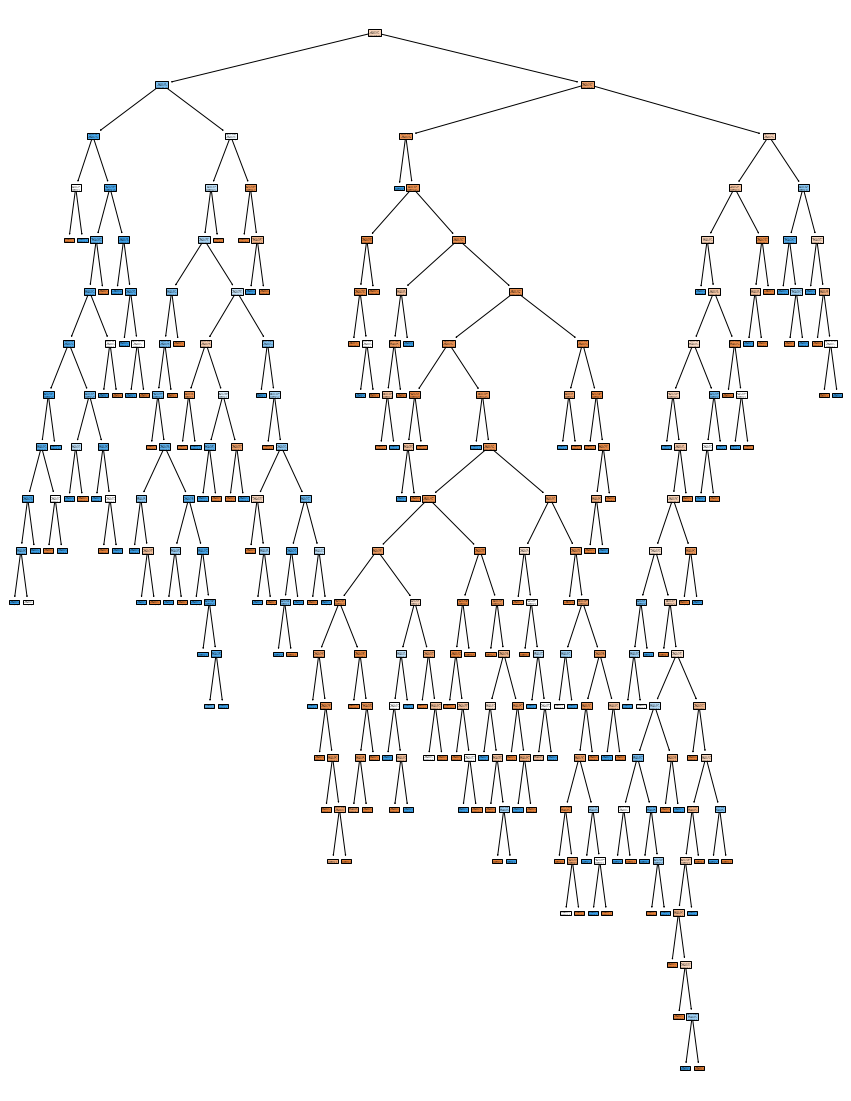

In [51]:
from sklearn import tree
plt.figure(figsize=(15,20))
tree.plot_tree(clf,filled=True)

In [52]:
y_train_pred = clf.predict(x_train) # clf=model
y_test_pred = clf.predict(x_test)

train_accuracy = accuracy_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)

print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 0.985553772070626
The test accuracy is 0.7425373134328358


In [53]:
train_score=clf.score(x_train,y_train) # train accuracy
test_score=clf.score(x_test,y_test)

print('The training score is', train_score)
print('The test score is', test_score)

The training score is 0.985553772070626
The test score is 0.7425373134328358


In [54]:
y_test_pred = clf.predict(x_test)
y_test_pred

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1], dtype=int64)

decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(x_train, y_train)
res_pred = decision_tree.predict(x_test)
score = accuracy_score(y_test, res_pred)
score = decision_tree.score(x_test, y_test)
score

Overfitting in decision tree:
Over-fitting is the phenomenon in which the learning system tightly fits the given training data so much that it would be inaccurate in predicting the outcomes of the untrained data. In decision trees, over-fitting occurs when the tree is designed so as to perfectly fit all samples in the training data set.

How do you solve the overfitting issue in a decision tree?

Two approaches to avoiding overfitting are distinguished: pre-pruning (generating a tree with fewer branches than would otherwise be the case) and post-pruning (generating a tree in full and then removing parts of it). Results are given for pre-pruning using either a size or a maximum depth cutoff.

In [55]:
clf.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier()>

In [56]:
clf.tree_

In [57]:
clf.score(x_test,y_test)

0.7425373134328358

## Now, lets use our trained model to predict the labels for the testing portion of our labeled data.Lets generate a confusion matrix that can summarize the performance of our trained model:

In [58]:
y_test_pred = clf.predict(x_test)
y_test_pred

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1], dtype=int64)

In [59]:
conf_mat= metrics.confusion_matrix(y_test,y_test_pred)
conf_mat

array([[133,  38],
       [ 31,  66]], dtype=int64)

In [60]:
# for model1

true_negative = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_positive = conf_mat[1][1]

In [61]:
print("True Negative: ",true_negative)
print("False Positive: ",false_positive)
print("False Negative: ",false_negative)
print("True Positive: ",true_positive)

True Negative:  133
False Positive:  38
False Negative:  31
True Positive:  66


In [62]:
Total_Error = false_negative+ false_positive
Total_Error

69

In [63]:
confusion_matrix = pd.DataFrame(conf_mat)

confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

                 Predicted Died  Predicted Survived
Actual Died                 133                  38
Actual Survived              31                  66


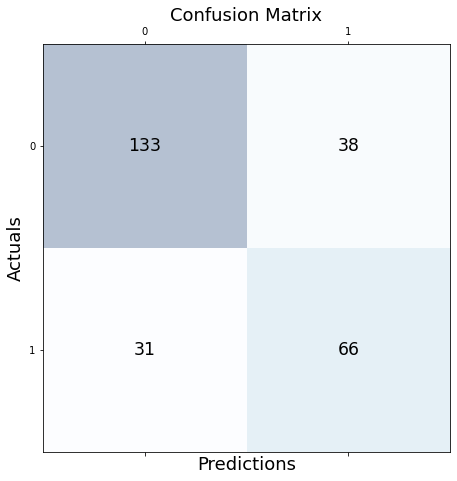

In [64]:
#
# Get the predictions
#
y_pred =clf.predict(x_test)
#
# Calculate the confusion matrix
#
conf_mat= metrics.confusion_matrix(y_test,y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))

ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)

for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i,s=conf_mat[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Now,lets caluclate the accuracy, recall and precision values for the created classfier by usng the deecision tree classfication algorithm:

In [65]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7425373134328358

In [66]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.6346153846153846

In [67]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.6804123711340206

In [68]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.6567164179104478

In [69]:
accuracy=metrics.accuracy_score(y_test,y_pred)
recall= metrics.recall_score(y_test,y_pred)
Precision=metrics.precision_score(y_test,y_pred)
f1_score=metrics.f1_score(y_test,y_pred)

In [70]:
print("Confusion_matrix accuracy :",accuracy)
print("Confusion_matrix precision :",Precision)
print("Confusion_matrix recall :",recall)
print("Confusion_matrix f1_score :",f1_score)
print("Confusion_matrix total error :",Total_Error)

Confusion_matrix accuracy : 0.7425373134328358
Confusion_matrix precision : 0.6346153846153846
Confusion_matrix recall : 0.6804123711340206
Confusion_matrix f1_score : 0.6567164179104478
Confusion_matrix total error : 69


# hyper_parameters

### Use grid_search cv to Hyperparameter:

In [71]:
 #we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [72]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [73]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [74]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 9, 'splitter': 'random'}


Improving the model Ok, high training accuracy and a lower testing accuracy. We may be overfitting a bit.

So now it's your turn to shine! Train a new model, and try to specify some parameters in order to improve the testing accuracy, such as:

    max_depth
    min_samples_leaf
    min_samples_split
    You can use your intuition, trial and error, or even better, feel free to use Grid Search!

In [75]:
grid_search.best_score_

0.8266451612903227

In [95]:
clf_model_1 = DecisionTreeClassifier(criterion = 'gini', max_depth =6, min_samples_leaf= 1, min_samples_split= 9, splitter ='random')
clf_model_1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=9, splitter='random')

In [96]:
y_train_pred_1 = clf_model_1.predict(x_train) # clf=model
y_test_pred_1 = clf_model_1.predict(x_test)

Train_accuracy = accuracy_score(y_train, y_train_pred_1)

Test_accuracy = accuracy_score(y_test, y_test_pred_1)

print('The training accuracy is', Train_accuracy)
print('The test accuracy is', Test_accuracy)

The training accuracy is 0.8426966292134831
The test accuracy is 0.7947761194029851


In [97]:
Train_score=clf_model_1.score(x_train,y_train)
Test_score=clf_model_1.score(x_test,y_test)

print('The training score is', Train_score)
print('The test score is', Test_score)

The training score is 0.8426966292134831
The test score is 0.7947761194029851


In [98]:
y_test_pred_1 =clf_model_1.predict(x_test)
y_test_pred_1

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0], dtype=int64)

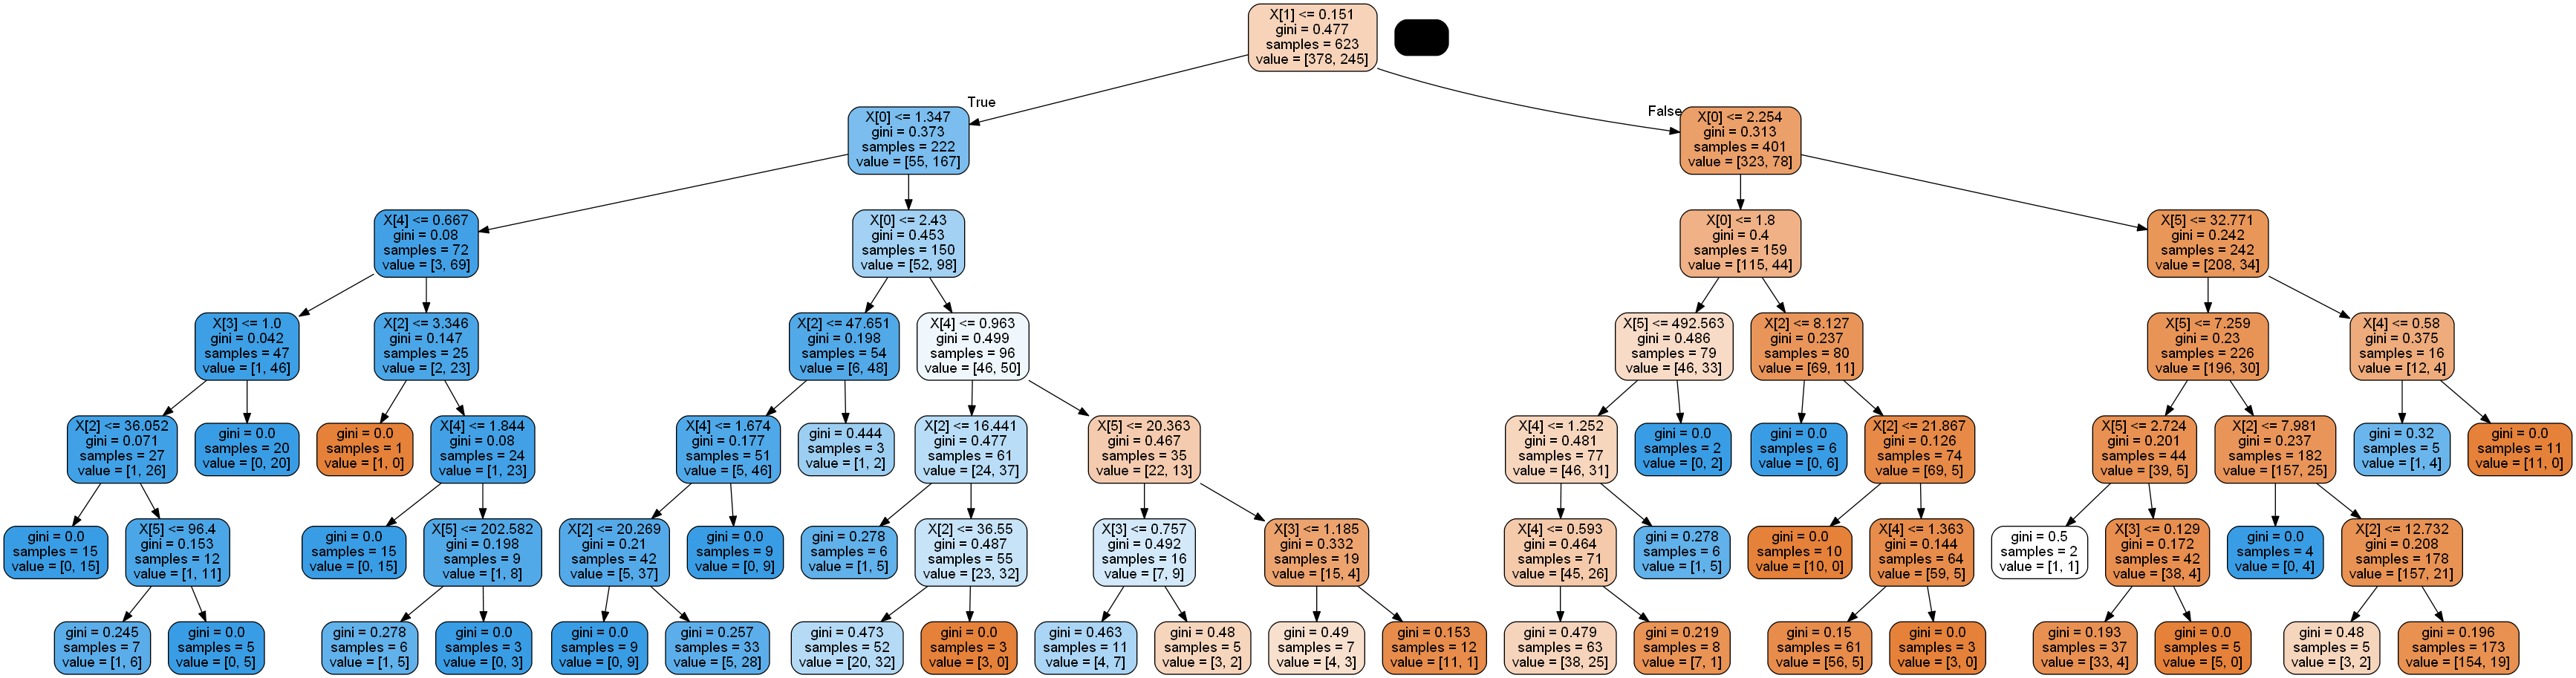

In [99]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf_model_1,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("tree.png")
# Show graph
Image(graph.create_png())

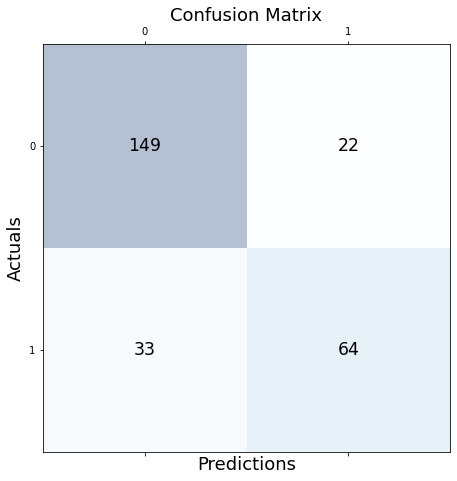

In [100]:
#
# Get the predictions
#
y_test_pred_1 =clf_model_1.predict(x_test)
#
# Calculate the confusion matrix
#
conf_mat_1= metrics.confusion_matrix(y_test,y_test_pred_1)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))

ax.matshow(conf_mat_1, cmap=plt.cm.Blues, alpha=0.3)

for i in range(conf_mat_1.shape[0]):
    for j in range(conf_mat_1.shape[1]):
        ax.text(x=j, y=i,s=conf_mat_1[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [101]:
confusion_matrix = pd.DataFrame(conf_mat_1)

confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

                 Predicted Died  Predicted Survived
Actual Died                 149                  22
Actual Survived              33                  64


In [102]:
conf_mat_1

array([[149,  22],
       [ 33,  64]], dtype=int64)

In [103]:
true_negative_1 = conf_mat_1[0][0]
false_positive_1 = conf_mat_1[0][1]
false_negative_1 = conf_mat_1[1][0]
true_positive_1 = conf_mat_1[1][1]

In [104]:
print("True Negative_1: ",true_negative_1)
print("False Positive_1: ",false_positive_1)
print("False Negative_1: ",false_negative_1)
print("True Positive_1: ",true_positive_1)

True Negative_1:  149
False Positive_1:  22
False Negative_1:  33
True Positive_1:  64


In [105]:
Total_Error_1 = false_negative_1 + false_positive_1
Total_Error_1

55

In [106]:
# Breaking down the formula for Accuracy
Accuracy_1 = (true_positive_1 + true_negative_1) / (true_positive_1 +false_positive_1 + false_negative_1 + true_negative_1)
Accuracy_1

0.7947761194029851

In [107]:

Precision_1 = true_positive_1/(true_positive_1+false_positive_1)
Precision_1

0.7441860465116279

In [108]:
# Recall
Recall_1 = true_positive_1/(true_positive_1+false_negative_1)
Recall_1

0.6597938144329897

In [109]:
# F1 Score
F1_Score_1 = 2*(Recall_1 * Precision_1) / (Recall_1 + Precision_1)
F1_Score_1

0.6994535519125683

In [110]:
accuracy_1=metrics.accuracy_score(y_test,y_test_pred_1)
recall_1= metrics.recall_score(y_test,y_test_pred_1)
Precision_1=metrics.precision_score(y_test,y_test_pred_1)
f1_score_1=metrics.f1_score(y_test,y_test_pred_1)

In [111]:
print("Confusion_matrix accuracy_1 :",accuracy_1)
print("Confusion_matrix precision_1 :",Precision_1)
print("Confusion_matrix recall_1 :",recall_1)
print("Confusion_matrix f1_score_1 :",f1_score_1)
print("Confusion_matrix total error_1 :",Total_Error_1)

Confusion_matrix accuracy_1 : 0.7947761194029851
Confusion_matrix precision_1 : 0.7441860465116279
Confusion_matrix recall_1 : 0.6597938144329897
Confusion_matrix f1_score_1 : 0.6994535519125683
Confusion_matrix total error_1 : 55


In [112]:
# save the model

In [113]:
# SAVE MODEL
import pickle

filename = 'passenger is survived or not_model.pickle'
pickle.dump(clf_model_1, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))

## Conclusion:
    
  ### Model (Without hyperparameter)
    
    Accuracy:
        
    The training accuracy is 0.985553772070626
    The test accuracy is 0.7425373134328358
    
    Score:
        
    The training score is 0.985553772070626
    The test score is 0.7425373134328358
    
    Confusion Matrix:
    
    True Negative:  133
    False Positive:  38
    False Negative:  31
    True Positive:  66
    
    Confusion_matrix accuracy : 0.7425373134328358
    Confusion_matrix precision : 0.6346153846153846
    Confusion_matrix recall : 0.6804123711340206
    Confusion_matrix f1_score : 0.6567164179104478
    Confusion_matrix total error : 69
    
    
  ### Model (With hyperparameter---Use grid_search cv to Hyperparameter)  
      
      
      Accuracy:
      The training accuracy is 0.8426966292134831
      The test accuracy is 0.7947761194029851
      
      Score:
        The training score is 0.8426966292134831
        The test score is 0.7947761194029851
      
      Confusion Matrix:
      
        True Negative_1:  149
        False Positive_1:  22
        False Negative_1:  33
        True Positive_1:  64
      
        Confusion_matrix accuracy_1 : 0.7947761194029851
        Confusion_matrix precision_1 : 0.7441860465116279
        Confusion_matrix recall_1 : 0.6597938144329897
        Confusion_matrix f1_score_1 : 0.6994535519125683
        Confusion_matrix total error_1 : 55
      
        